In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [314]:
mu=1
m=1
a=0.01
niter=int(25/a)
step=2

c1=m/a
c2=(a*(mu**2))/2

num_accept=0

def daction(x1,x,xm1,xp):
    dxn=xp-x
    sxn=xp+x
    sx1=x1+xm1
    
    delta_s=dxn*(sxn*(c1 + c2) -sx1*c1)
    
    return delta_s

state=0*np.random.random_sample((100,))
num_el=state.size
x_pos=np.arange(0)
x_pos2=np.arange(0)
sum1=0
sum2=0
for h in state:
    sum1=sum1+h
    sum2=sum2+h**2
x_pos=np.append(x_pos, sum1/num_el)
x_pos2=np.append(x_pos2, sum2/num_el)
    

for _ in range(niter):
   
    
    for n in range(num_el):
        
        x_t=(np.random.uniform((state[n]-step), (state[n]+step)))
        if n==0:
            delta=daction(state[n+1],state[n],state[num_el-1],x_t)
            
            if np.exp(-delta)> (np.random.uniform(0,1)):
                np.put(state,[n],[x_t])
                num_accept=num_accept+1
            else:
                pass
                
        elif n==(num_el-1):
            delta=daction(state[0],state[n],state[n-1],x_t)
            
            if np.exp(-delta)> (np.random.uniform(0,1)):
                np.put(state,[n],[x_t])
                num_accept=num_accept+1
            else:
                pass
        else:
            delta=daction(state[n+1],state[n],state[n-1],x_t)
            
            if  np.exp(-delta) > (np.random.uniform(0,1)):
                np.put(state,[n],[x_t1])
                num_accept=num_accept+1
            else:
                pass
    
    #print(state)        
    sum1=0
    sum2=0
    for h in state:
        sum1=sum1+h
        sum2=sum2+h**2
    x_pos=np.append(x_pos, sum1/num_el)
    x_pos2=np.append(x_pos2, sum2/num_el)
            
        
        
        
       
        
        
print(num_accept/(niter*num_el))      
    

0.044536


2501
2501


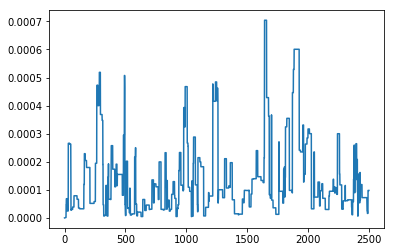

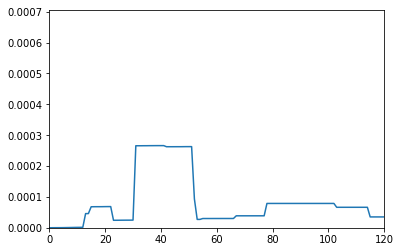

In [315]:
#plt.figure(1)
time=np.arange(niter+1)
print(time.size)
print(x_pos.size)
#plt.plot(time, x_pos)
#plt.show()

plt.figure(1)
plt.plot(time, x_pos2)
plt.show()

plt.figure(2)
plt.plot(time, x_pos2)
plt.axis([0,120,0,max(x_pos2)])
plt.show()

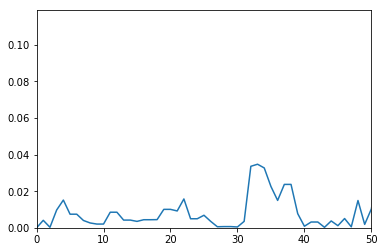

In [313]:
plt.plot(time, x_pos2)
plt.axis([0,50,0,max(x_pos2)])
plt.show()

In [159]:
np.random.uniform((0-step), (0+step))

-0.45325134243975485

In [149]:
0*np.arange(10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])